In [22]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [23]:
phldata = pd.read_csv("cleandata.csv")
#Dropping non-object features for ML models
phldata=phldata.drop(columns=['P_NAME','S_NAME','P_TYPE','P_TYPE_TEMP','S_TYPE_TEMP'])
phldata.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_PERIOD               2026 non-null   float64
 1   S_DEC                  2026 non-null   float64
 2   S_MAG                  2026 non-null   float64
 3   S_MASS                 2026 non-null   float64
 4   S_TEMPERATURE          2026 non-null   float64
 5   P_DISTANCE             2026 non-null   float64
 6   P_FLUX                 2026 non-null   float64
 7   P_TEMP_EQUIL           2026 non-null   float64
 8   S_RADIUS_EST           2026 non-null   float64
 9   S_LUMINOSITY           2026 non-null   float64
 10  P_HABITABLE            2026 non-null   int64  
 11  P_ESI                  2026 non-null   float64
 12  P_RADIUS_EST           2026 non-null   float64
 13  P_MASS_EST             2026 non-null   float64
 14  P_SEMI_MAJOR_AXIS_EST  2026 non-null   float64
dtypes: f

In [24]:
# Putting feature variable to X
X = phldata.drop('P_HABITABLE',axis=1)
# Putting response variable to y
y = phldata['P_HABITABLE']

In [25]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((1620, 14), (406, 14))

Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [27]:
%%time
classifier_rf.fit(X_train, y_train)

#Calculate OOB(the number of correctly predicted rows from the out of bag sample.)
classifier_rf.oob_score_

Wall time: 251 ms


0.9919753086419754

In [28]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [29]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [30]:
%%time
grid_search.fit(X_train, y_train)
grid_search.best_score_

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 1min 51s


0.9932098765432098

In [20]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

IndexError: list index out of range

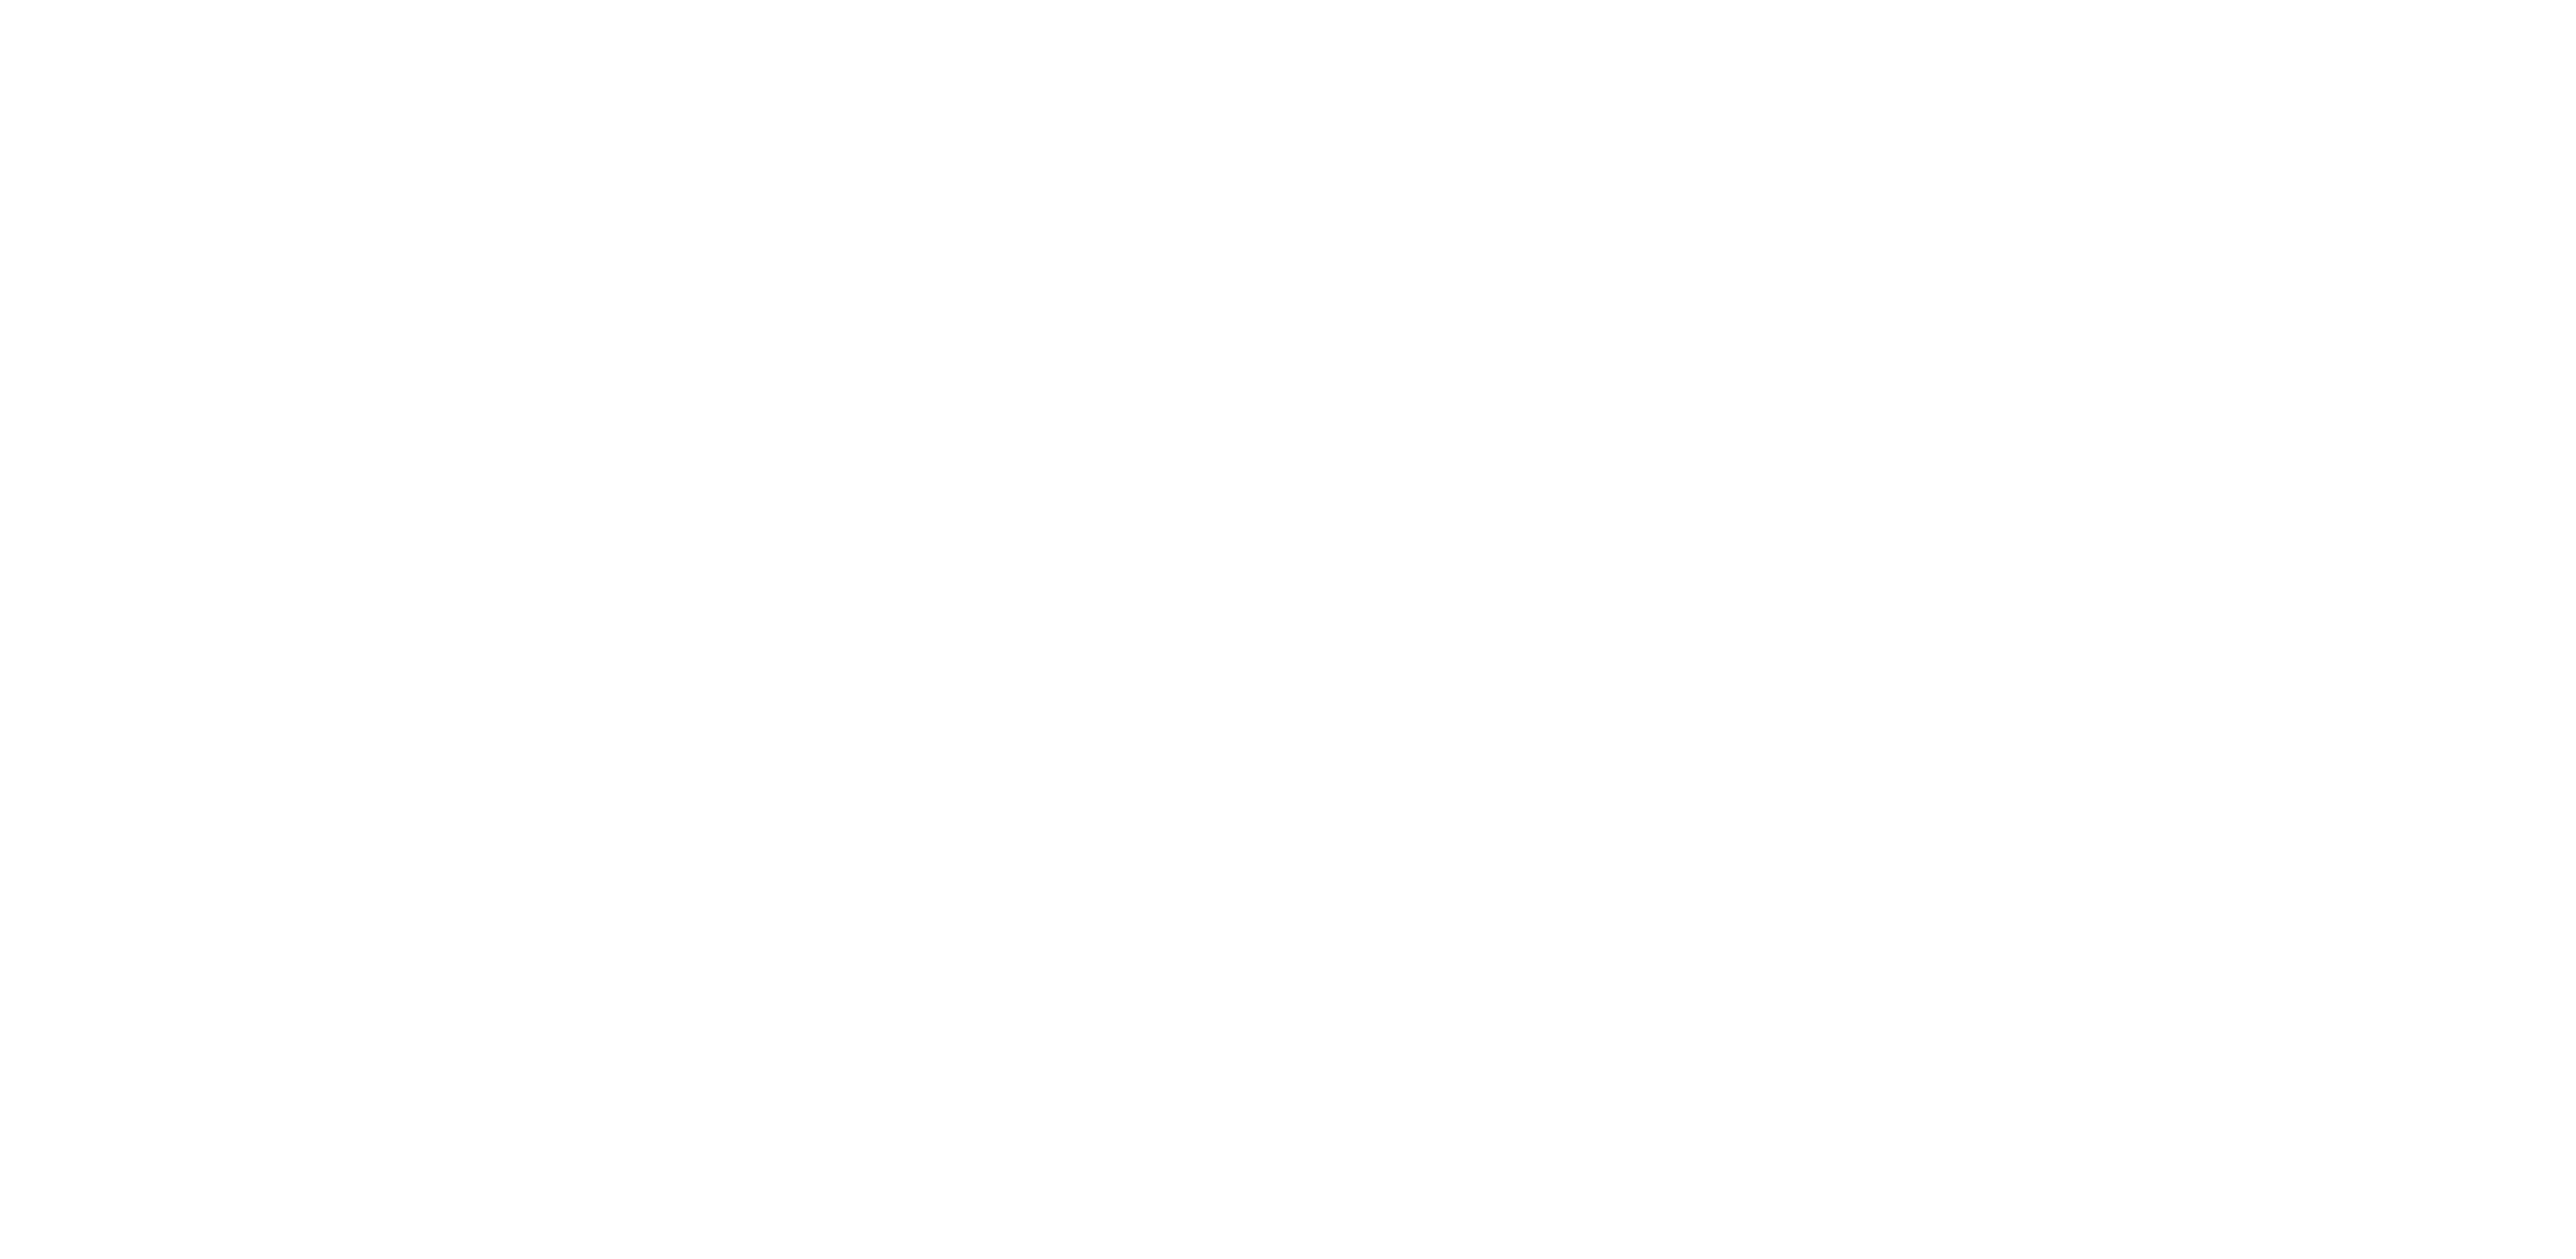

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[2], feature_names = X.columns,class_names=['Non Habitable', "Habitable"],filled=True);

In [ ]:
#Sort data with the help of feature importance
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

Gradient Boosting Algorithm (GBM)

In [ ]:
#GBM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)
model.fit(X_train,y_train)

In [ ]:
predict_train = model.predict(X_train)
print('Target on train data: ',predict_train) 

accuracy_train = accuracy_score(y_train,predict_train)
print('Accuracy_score on train dataset: ', accuracy_train)

predict_test = model.predict(X_test)
print('Target on test data: ', predict_test) 

accuracy_test = accuracy_score(y_test,predict_test)
print('Accuracy score on test dataset: ', accuracy_test)